In [1]:
import hypernetx as hnx
import networkx as nx
import matplotlib.pyplot as plt
import random
import time
import cProfile
import trace
import numpy as np
from collections import defaultdict
import pandas as pd
from hypernetx.utils.toys import TransmissionProblem
from hypernetx import dist_stats
from hypernetx.utils.read_write import read_df

In [2]:
number_of_runs = 1000

n = 1000
m = 10000

hyperedgeList = [set(random.sample(range(n), k=random.choice(range(2,3)))) for i in range(m)]

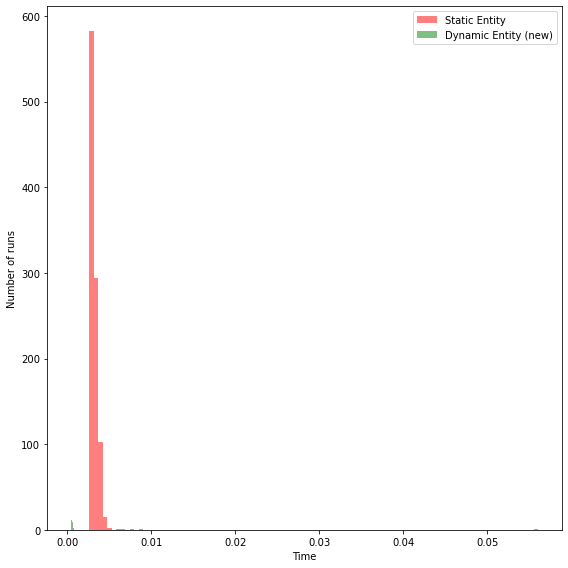

In [3]:
# Benchmark constructing a sparse incidence matrix, dynamic vs. static.
timeStatic = list()
timeDynamic = list()
for run in range(number_of_runs):
    start = time.time()
    h = hnx.Hypergraph(hyperedgeList, static=True)
    timeStatic.append(time.time() - start)
    
    start = time.time()
    h = hnx.Hypergraph(hyperedgeList, static=False)
    timeDynamic.append(time.time() - start)

plt.figure()
plt.hist(timeStatic, bins=100, color='red', density=False, alpha=0.5, label='Static Entity')
plt.hist(timeDynamic, bins=100, color='green', density=False, alpha=0.5, label='Dynamic Entity (new)')
plt.xlabel('Time')
plt.ylabel('Number of runs')
plt.legend()
plt.tight_layout()
plt.savefig('construction_time_comparison.pdf',dpi=600)
plt.show()

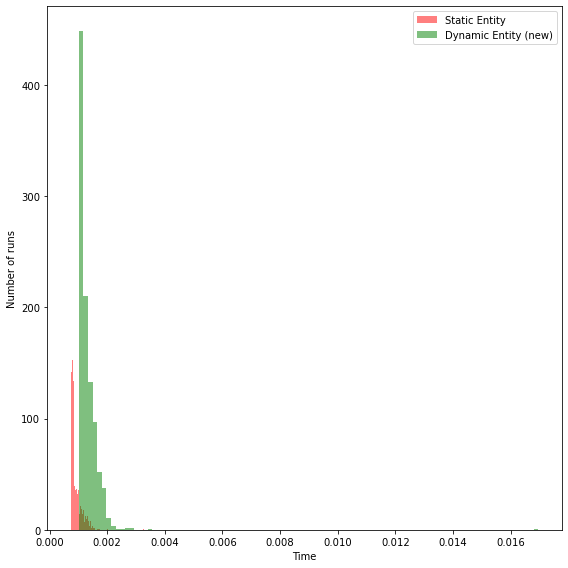

In [4]:
# Benchmark constructing a sparse incidence matrix, dynamic vs. static.
timeStatic = list()
timeDynamic = list()
for run in range(number_of_runs):
    h = hnx.Hypergraph(hyperedgeList, static=True)
    start = time.time()
    h.incidence_matrix()
    timeStatic.append(time.time() - start)
    h = hnx.Hypergraph(hyperedgeList, static=False)
    start = time.time()
    h.incidence_matrix()
    timeDynamic.append(time.time() - start)

plt.figure()
plt.hist(timeStatic, bins=100, color='red', density=False, alpha=0.5, label='Static Entity')
plt.hist(timeDynamic, bins=100, color='green', density=False, alpha=0.5, label='Dynamic Entity (new)')
plt.xlabel('Time')
plt.ylabel('Number of runs')
plt.legend()
plt.tight_layout()
plt.savefig('incidence_matrix_time_comparison.pdf',dpi=600)
plt.show()

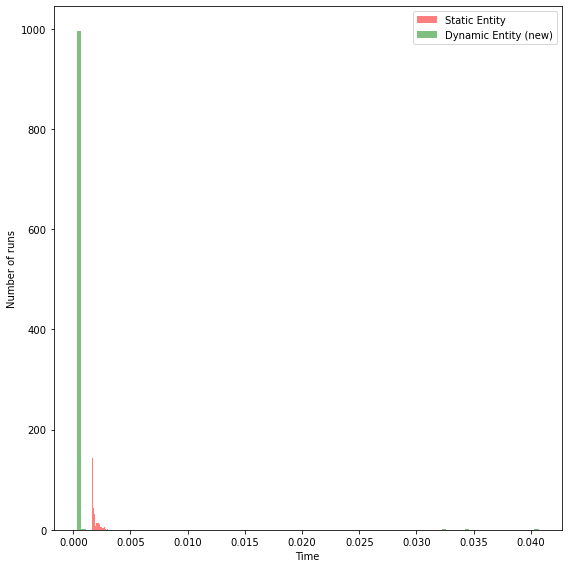

In [3]:
# Benchmark constructing the dual, dynamic vs. static.
timeStatic = list()
timeDynamic = list()
for run in range(number_of_runs):
    h = hnx.Hypergraph(hyperedgeList, static=True)
    start = time.time()
    h.dual()
    timeStatic.append(time.time() - start)
    h = hnx.Hypergraph(hyperedgeList, static=False)
    start = time.time()
    h.dual()
    timeDynamic.append(time.time() - start)

plt.figure()
plt.hist(timeStatic, bins=100, color='red', density=False, alpha=0.5, label='Static Entity')
plt.hist(timeDynamic, bins=100, color='green', density=False, alpha=0.5, label='Dynamic Entity (new)')
plt.xlabel('Time')
plt.ylabel('Number of runs')
plt.legend()
plt.tight_layout()
plt.savefig('dual_time_comparison.pdf',dpi=600)
plt.show()

0.001757829189300537
0.00015131711959838866


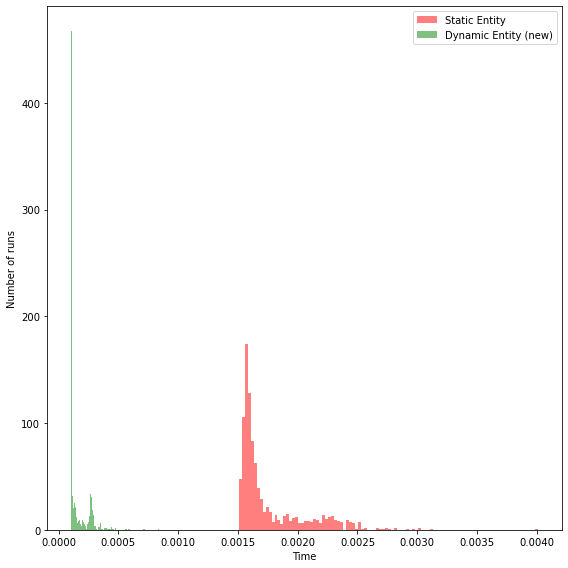

In [8]:
# Benchmark constructing a incidence dict, dynamic vs. static.
timeStatic = list()
timeDynamic = list()
for run in range(number_of_runs):
    h = hnx.Hypergraph(hyperedgeList, static=True)
    start = time.time()
    h.incidence_dict
    timeStatic.append(time.time() - start)
    h = hnx.Hypergraph(hyperedgeList, static=False)
    start = time.time()
    h.incidence_dict
    timeDynamic.append(time.time() - start)

print(np.mean(timeStatic))
print(np.mean(timeDynamic))
plt.figure()
plt.hist(timeStatic, bins=100, color='red', density=False, alpha=0.5, label='Static Entity')
plt.hist(timeDynamic, bins=100, color='green', density=False, alpha=0.5, label='Dynamic Entity (new)')
plt.xlabel('Time')
plt.ylabel('Number of runs')
plt.legend()
plt.tight_layout()
plt.savefig('incidence_dict_time_comparison.pdf',dpi=600)
plt.show()